<div style="background-color:rgba(100, 160, 200, 0.33);">

<h1>Assignment 3 - Mobile Tracking</h1>

<p>
    <b>Abstract</b>: Monitor and analyze the mobility of nearby mobile device users, using Wi-Fi probe requests.
</p>

</div>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3> Device vendor frequency </h3>
<p>
    The data is from the probe requests collected at the Chicago airport.
<p>

In [1]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

lst = []
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

def get_unique_list(file):
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst.append(row[2])
        return Counter(lst)
    
def create_histogram(list, ven):
    for v in ven:
        for lst in list:
            if lst.startswith(v[0]):
                v[1] += 1
    return ven

lst_c = get_unique_list('airport_chicago/probe_req.csv')
hist_c = create_histogram(lst_c, vendor)
print(hist_c)

[['Apple', 69], ['Google', 71], ['Samsung', 42], ['LGE', 11], ['HTC', 5], ['Huawei', 2], ['Xiaomi', 2], ['HMD', 1], ['Nest', 3]]


<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Visualization </h2>
<h3> Chicago Airport Data </h3>

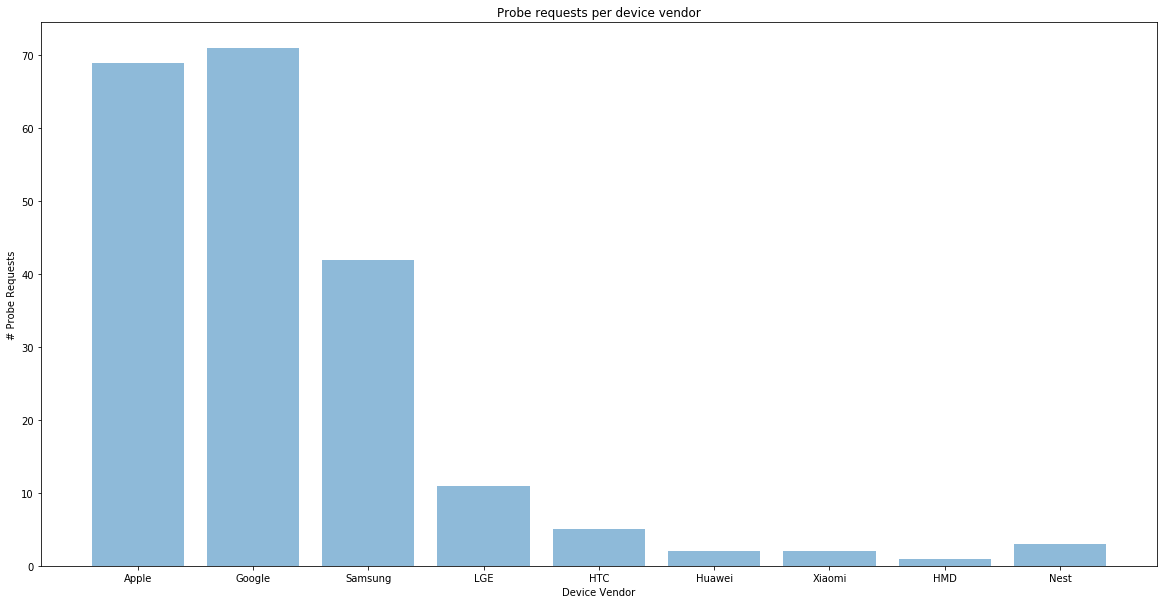

In [2]:
def plot_histogram(lst):
    plt.figure(3,figsize=(20,10)) 
    
    y_pos = np.arange(len(lst))
    accesses = [x[1] for x in lst]
    
    plt.bar(y_pos, accesses, align='center', alpha=0.5) 
    plt.xticks(range(len(lst)), [x[0] for x in lst], size='medium')
 
    plt.xlabel('Device Vendor')
    plt.ylabel('# Probe Requests')
    plt.title('Probe requests per device vendor')
    plt.show()
    
plot_histogram(hist_c)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3> Warsaw Airport Data </h3>

In [3]:
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

lst_w = get_unique_list('airport_warsaw/probe_req.csv')
hist_w = create_histogram(lst_w, vendor)
print(hist_w)

[['Apple', 130], ['Google', 95], ['Samsung', 58], ['LGE', 11], ['HTC', 5], ['Huawei', 7], ['Xiaomi', 7], ['HMD', 1], ['Nest', 3]]


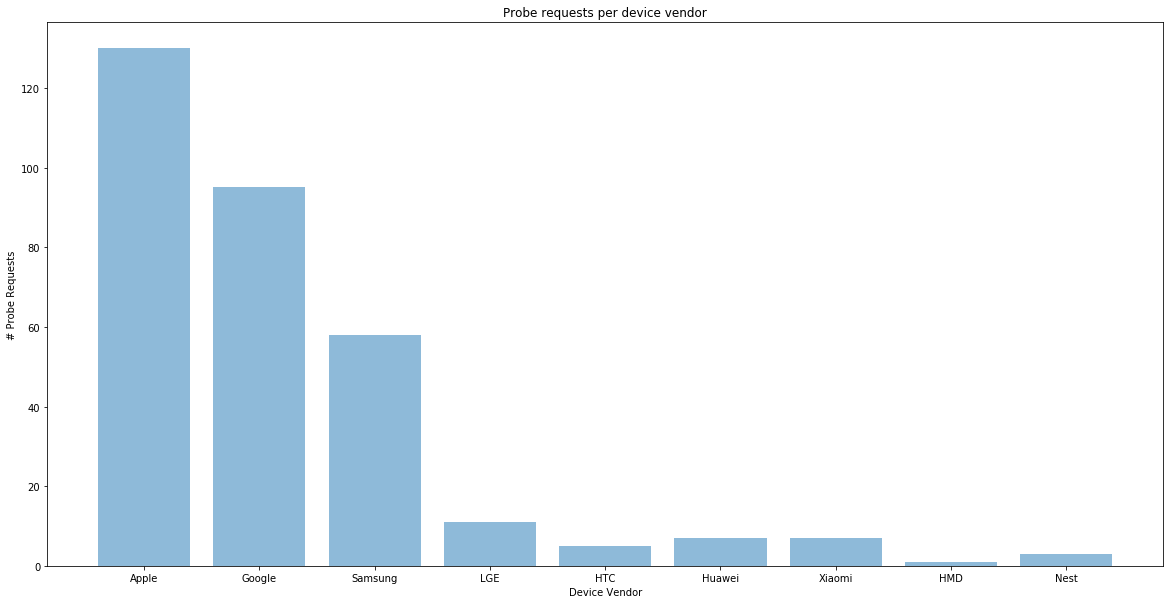

In [4]:
plot_histogram(hist_w)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h3> Chicago Downtown Dataset </h3>

In [5]:
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

lst_cd = get_unique_list('downtown_chicago/probe_req.csv')
hist_cd = create_histogram(lst_cd, vendor)
print(hist_cd)

[['Apple', 215], ['Google', 688], ['Samsung', 82], ['LGE', 33], ['HTC', 5], ['Huawei', 7], ['Xiaomi', 7], ['HMD', 1], ['Nest', 7]]


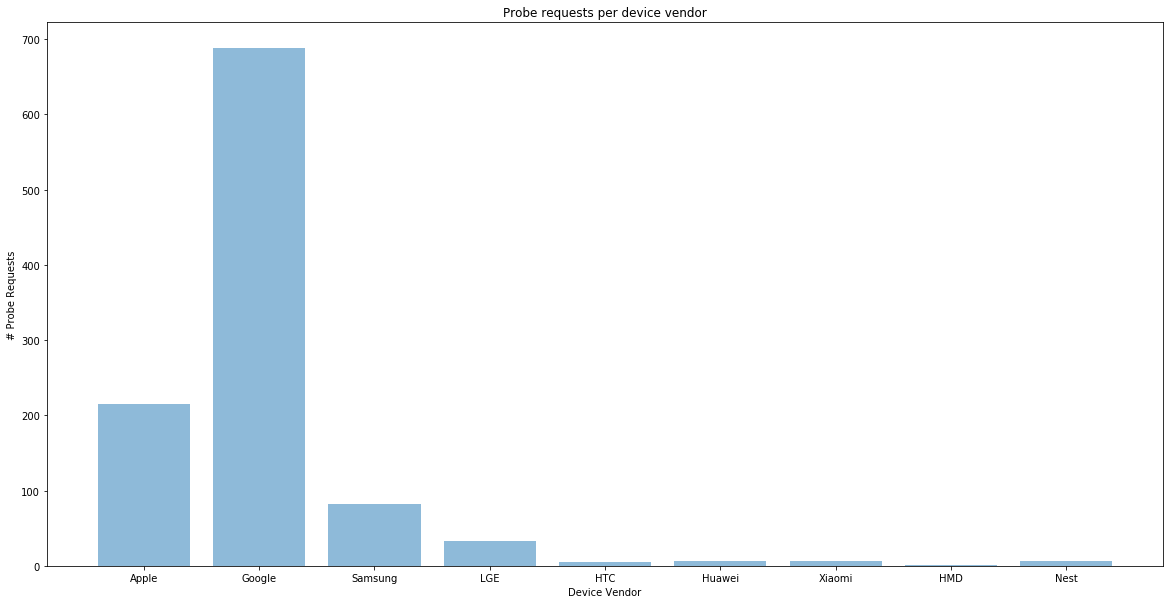

In [6]:
plot_histogram(hist_cd)

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Analysis </h2>

The device vendor distribution is similar in both the captures as infered from the plots. Apple is the single most popular device vendor followed by Google and its Android counterparts.

<h3> Wildcard or not? </h3>

In [7]:
def get_info_list(file):
    lst_info = []
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst_info.append(row[6])
        return lst_info
    
def isWildcard(list):
    count = 0
    for lst in list:
        if 'Wildcard' in lst: 
            count += 1
    return count    

lst_i_c = get_info_list('airport_chicago/probe_req.csv')
wild_c = isWildcard(lst_i_c)
wildcard_per_c = (wild_c/len(lst_i_c))*100
print("At Chicago airport, " + str(round(wildcard_per_c, 2)) + "% of probe requests are wildcard requests.")

lst_i_w = get_info_list('airport_warsaw/probe_req.csv')
wild_w = isWildcard(lst_i_w)
wildcard_per_w = (wild_w/len(lst_i_w))*100
print("At Warsaw airport, " + str(round(wildcard_per_w, 2)) + "% of probe requests are wildcard requests.")

At Chicago airport, 78.18% of probe requests are wildcard requests.
At Warsaw airport, 81.25% of probe requests are wildcard requests.


1243
[   0    1    2 ... 1241 1242 1243]
[6, 3, 8, 2, 6, 5, 1, 5, 3, 3, 8, 4, 7, 3, 9, 9, 6, 1, 11, 9, 2, 3, 4, 3, 7, 0, 1, 5, 0, 13, 5, 5, 3, 4, 4, 7, 5, 1, 4, 5, 9, 4, 5, 7, 5, 11, 5, 6, 6, 17, 1, 3, 5, 1, 5, 6, 9, 4, 3, 5, 5, 10, 4, 8, 4, 4, 3, 15, 11, 6, 8, 15, 5, 2, 13, 1, 6, 5, 5, 3, 6, 6, 0, 5, 3, 1, 5, 12, 8, 2, 10, 3, 6, 6, 2, 3, 6, 3, 3, 7, 4, 0, 2, 4, 2, 10, 3, 3, 0, 2, 1, 8, 4, 9, 4, 0, 2, 3, 3, 7, 1, 6, 5, 9, 0, 2, 4, 5, 2, 5, 4, 3, 3, 2, 4, 5, 7, 8, 2, 7, 1, 7, 6, 4, 2, 3, 1, 3, 6, 5, 4, 6, 5, 4, 5, 2, 3, 2, 3, 1, 6, 3, 2, 4, 6, 3, 3, 1, 4, 1, 4, 4, 4, 1, 2, 5, 8, 4, 6, 3, 4, 4, 5, 4, 1, 0, 5, 1, 4, 5, 3, 8, 0, 5, 3, 0, 4, 4, 5, 4, 6, 0, 2, 2, 2, 2, 7, 2, 5, 5, 6, 5, 4, 2, 1, 8, 5, 1, 2, 9, 8, 3, 5, 0, 4, 2, 1, 4, 6, 2, 1, 2, 1, 13, 1, 6, 3, 5, 5, 4, 5, 7, 2, 3, 4, 0, 4, 5, 4, 3, 6, 10, 2, 4, 9, 3, 4, 6, 7, 9, 6, 4, 5, 0, 1, 2, 1, 5, 9, 7, 3, 7, 7, 5, 3, 5, 2, 3, 1, 2, 6, 4, 3, 1, 2, 2, 6, 5, 4, 2, 7, 10, 4, 4, 5, 4, 1, 3, 6, 1, 2, 2, 2, 6, 3, 8, 0, 0, 2, 6, 2, 4, 3, 0, 2

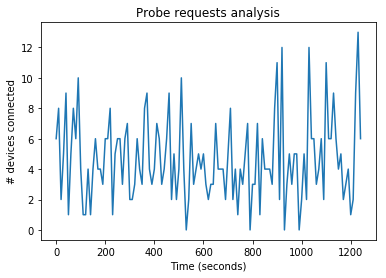

In [8]:
TIME_INDEX = 1
INFO_INDEX = -1
PROBE_INDEX = 6
MAC_INDEX = 2


class Analyser:
    def __init__(self):
        self.x = []
        self.y = []
        self.z = []

    def readCSV(self, filename):
        file = open(filename, 'r')
        return file

    def show(self):
        plt.plot(self.x, self.y)
        
        plt.xlabel('Time (seconds)')
        plt.ylabel('# devices connected')
        plt.title('Probe requests analysis')
        plt.show()

    def processData(self):
        pass

class ProbeAnalysis(Analyser):
    def __init__(self, filename):
        super().__init__()
        self.filename = filename
        self.mac = {}
        self.wantedList = ["Raspberr_3f:48:74", "AVMAudio_42:d6:ff", "Sagemcom_9b:c2:74", "Raspberr_76:f1:56"]

    def processData(self):
        result = {}
        file = self.readCSV(self.filename)
        document = file.readlines()
        size = int(float(document[-1].split(",")[1][1:-1]))
        print(size)
        self.x = np.array(range(0, size + 1))
        for i in range(size):
            result[i] = []
        print(self.x)
        for line in document:
            line = line.split(',')
            if line[PROBE_INDEX][1:] == "Probe Request" and line[MAC_INDEX][1:-1] not in self.wantedList:
                key = int(float(line[TIME_INDEX][1:-1]))
                if key not in result.keys():
                    result[key] = []
                result[key] = result[key] + [line[MAC_INDEX]]
        self.y = [len(result[x]) for x in result.keys()]
        print(self.y)
        print(len(self.y))
        print(sum(self.y))
        #self.x = self.x[7200:10800]
        #self.y = self.y[7200:10800]
        self.x = self.x[0:-1:10]
        self.y = self.y[0:-1:10]         


app = ProbeAnalysis("airport_chicago/probe_req.csv")
app.processData()
app.show()

[   0    1    2 ... 1241 1242 1243]


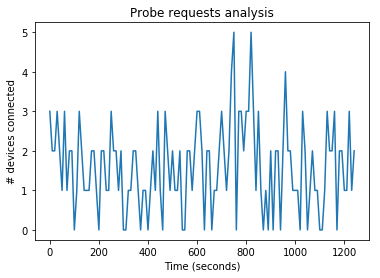

In [9]:
import matplotlib.pyplot as plt
import numpy as np

TIME_INDEX = 1
INFO_INDEX = -1
PROBE_INDEX = 6
MAC_INDEX = 2


class Analyser:
    def __init__(self):
        self.x = []
        self.y = []

    def readCSV(self, filename):
        file = open(filename, 'r')
        return  file.readlines()

    def show(self):
        plt.plot(self.x[1:-1:10], self.y[1:-1:10])
        plt.xlabel('Time (seconds)')
        plt.ylabel('# devices connected')
        plt.title('Probe requests analysis')
        plt.show()
        plt.show()

    def processData(self):
        pass

class ProbeAnalysis(Analyser):
    def __init__(self, filename):
        super().__init__()
        self.filename = filename
        self.mac = []
        self.wantedList = ["Raspberr_3f:48:74", "AVMAudio_42:d6:ff", "Sagemcom_9b:c2:74"]

    def isWildcard(self, inp):
        if len(inp) >= 2 and inp[1] == "Wildcard (Broadcast)":
            return True
        return False
    def processData(self):
        result = {}
        document = self.readCSV(self.filename)
        size = int(float(document[-1].split(",")[1][1:-1]))
        self.x = np.array(range(0, size + 1))
        for i in range(size):
            result[i] = []
        print(self.x)
        for line in document:
            line = line.split(',')
            wildcard = line[INFO_INDEX][:-2].split("=")

            if line[PROBE_INDEX][1:] == "Probe Request" and self.isWildcard(wildcard) and line[MAC_INDEX][1:-1] not in self.wantedList :

                key = int(float(line[TIME_INDEX][1:-1]))
                if key not in result.keys():
                    result[key] = []
                result[key] = result[key] + [line[MAC_INDEX][1:-1]]

                if line[MAC_INDEX][1:-1] not in self.mac:
                    self.mac.append(line[MAC_INDEX][1:-1]) #add mac_addr list

        return result

    def constructProbeAnalysis(self, result):
        self.y = [len(result[x]) for x in result.keys()]
        print(self.y)
        print(len(self.y))
        print(sum(self.y))
        #self.x = self.x[7200:10800]
        #self.y = self.y[7200:10800]
        #self.x = self.x[:60]
        #self.y = self.y[:60]

    def constructMacAnalysis(self, result):
        temp = []
        mac = []
        for i in result.keys():
            count = 0
            for j in result[i]:
                if j not in mac:
                    mac.append(j)
                    count = count + 1
            temp.append(count)
        self.y = temp

    def getMacNum(self):
        return self.mac


app = ProbeAnalysis("airport_chicago/probe_req.csv")
result = app.processData()
app.constructMacAnalysis(result)
app.show()

<h3> Airport Probe Response </h3>

In [19]:
ap_lst = []
vendor = [['Apple', 0], 
          ['Google', 0],
          ['Samsung', 0],
          ['Cisco', 0],
          ['Ruckus', 0],
          ['ARRIS', 0],
          ['Shenzhen', 0],
          ['Huawei', 0],
          ['LGE', 0]]

def get_unique_list(file):
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst.append(row[2])
        return Counter(lst)
        
def create_histogram(list, ven):
    for v in ven:
        for lst in list:
            if lst.startswith(v[0]):
                v[1] += 1
    return ven

lst_ap = get_unique_list('airport_chicago/probe_res.csv')
hist_ap = create_histogram(lst_ap, vendor)
print("List of AP vendors with frequency of Probe Responses")
print(lst_ap)

List of AP vendors with frequency of Probe Responses
Counter({'Cisco_1c:42:e3': 44536, 'Cisco_1c:42:e0': 44446, 'Cisco_91:3f:00': 19932, 'RuckusWi_17:93:08': 19784, 'Cisco_91:3f:04': 19052, 'Cisco_91:3f:01': 18748, 'Cisco_91:3f:03': 16688, 'a2:17:c8:10:14:78': 6544, 'a6:17:c8:10:14:78': 6110, 'aa:17:c8:10:14:78': 5914, 'CiscoMer_10:14:78': 5464, 'ARRISGro_ae:0e:00': 4572, 'ARRISGro_69:39:20': 4242, 'Cisco_8a:49:f1': 2084, 'Cisco_8a:49:f4': 2048, 'Cisco_8a:49:f0': 1966, 'Cisco_8a:49:f3': 1942, 'Raspberr_76:f1:56': 1481, 'Sonos_d9:43:30': 761, 'Sonos_17:3a:ab': 717, 'e2:55:7d:3a:ae:e3': 708, 'e2:55:7d:3a:ae:e2': 652, 'e2:55:7d:3a:ae:e1': 624, 'e2:55:7d:3a:ae:e0': 512, 'ARRISGro_55:29:f0': 276, 'Shenzhen_d6:e8:cb': 273, 'Shenzhen_d6:d4:e8': 261, 'HTC_ec:54:0b': 255, 'MurataMa_19:42:4f': 220, '7e:a1:b4:e7:56:23': 150, 'AMPAKTec_5d:5d:94': 139, 'Teleepoc_01:bb:03': 135, 'SonyMobi_35:5e:9d': 127, 'd2:40:d0:56:a5:97': 116, 'Apple_69:71:25': 116, '92:17:c8:10:14:78': 98, 'SamsungE_18:a1:0f': 8

In [20]:
print("Most active AP list")
print(Counter(lst).most_common(25))

Most active AP list
[('Cisco_1c:42:e3', 44536), ('Cisco_1c:42:e0', 44446), ('Cisco_91:3f:00', 19932), ('RuckusWi_17:93:08', 19784), ('Cisco_91:3f:04', 19052), ('Cisco_91:3f:01', 18748), ('Cisco_91:3f:03', 16688), ('a2:17:c8:10:14:78', 6544), ('a6:17:c8:10:14:78', 6110), ('aa:17:c8:10:14:78', 5914), ('CiscoMer_10:14:78', 5464), ('ARRISGro_ae:0e:00', 4572), ('ARRISGro_69:39:20', 4242), ('Cisco_8a:49:f1', 2084), ('Cisco_8a:49:f4', 2048), ('Cisco_8a:49:f0', 1966), ('Cisco_8a:49:f3', 1942), ('Raspberr_76:f1:56', 1481), ('Sonos_d9:43:30', 761), ('Sonos_17:3a:ab', 717), ('e2:55:7d:3a:ae:e3', 708), ('e2:55:7d:3a:ae:e2', 652), ('e2:55:7d:3a:ae:e1', 624), ('e2:55:7d:3a:ae:e0', 512), ('ARRISGro_55:29:f0', 276)]


In [21]:
print("Unique AP vendor list")
print(hist_ap)

Unique AP vendor list
[['Apple', 215], ['Google', 688], ['Samsung', 82], ['Cisco', 11], ['Ruckus', 7], ['ARRIS', 10], ['Shenzhen', 8], ['Huawei', 7], ['LGE', 33]]


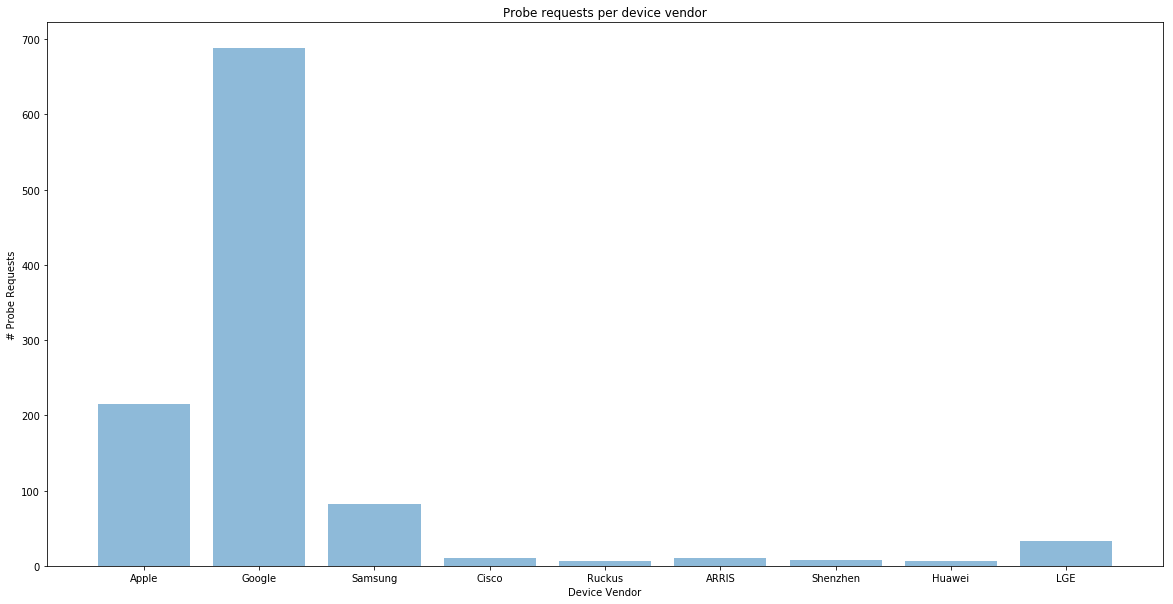

In [22]:
plot_histogram(hist_ap)

<h3> Analysis </h3>

<p>  A few APs with a large amount of probes. A large set of mobile hotspots with a small number of probe responses. <p>